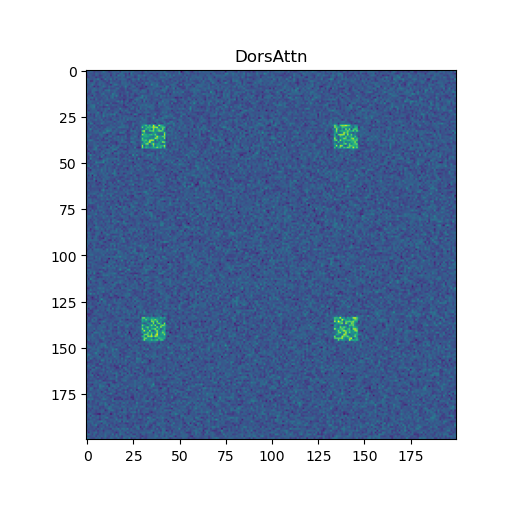

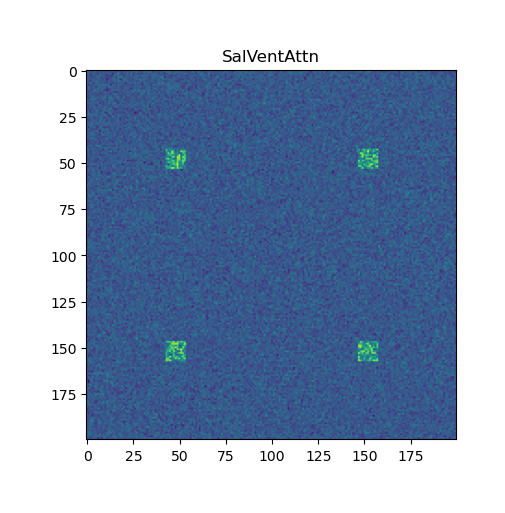

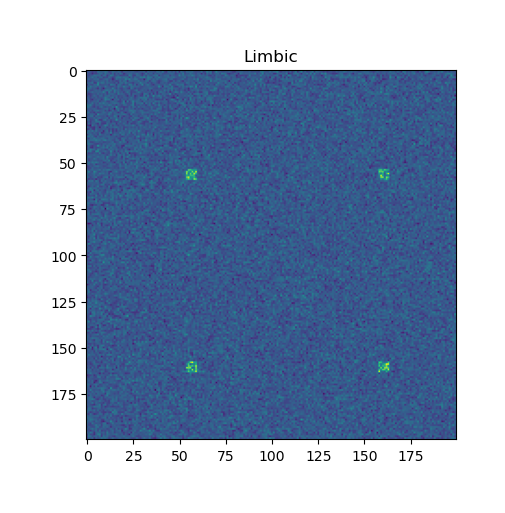

In [8]:
from neuroginius.synthetic_data.generation import generate_topology
from neuroginius.atlas import Atlas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from bold_dementia.cogpred import MatrixResult

ATLAS = "schaefer200"
atlas = Atlas.from_name(ATLAS, soft=False)

arr = np.array(atlas.macro_labels)
rng = np.random.default_rng(1999)
networks = rng.choice(np.unique(arr), 3, replace=False)

matrices = []
for network in networks:
    mat = generate_topology(network, atlas.macro_labels)
    mat *= rng.uniform(0, 1, size=mat.shape)
    mat += rng.normal(0, 0.1, size=mat.shape)
    matrices.append(mat)
    plt.imshow(mat)
    plt.title(network)
    plt.show()
matrices = np.stack(matrices)

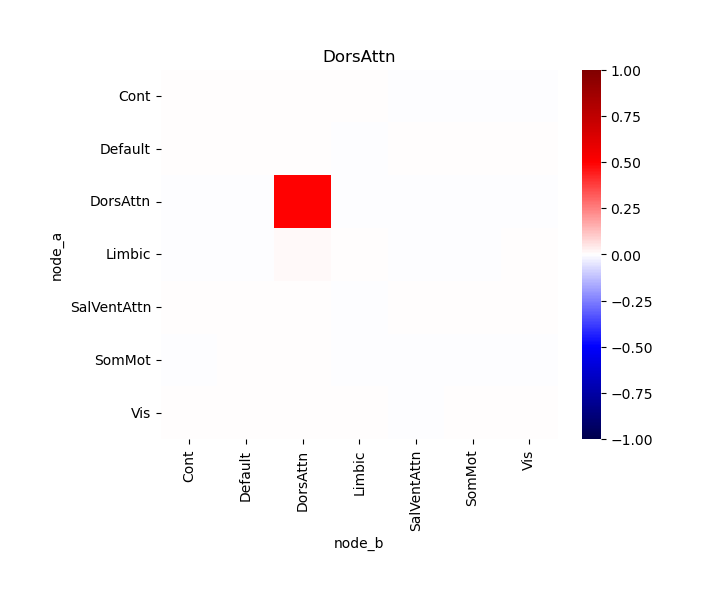

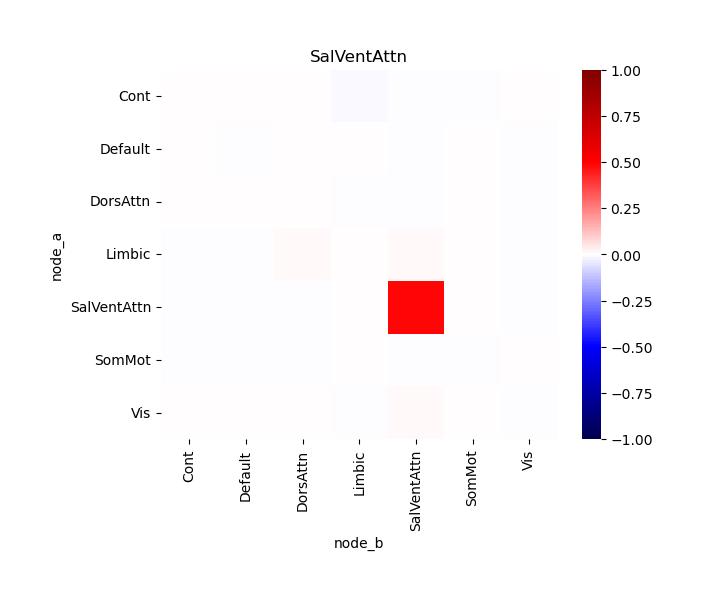

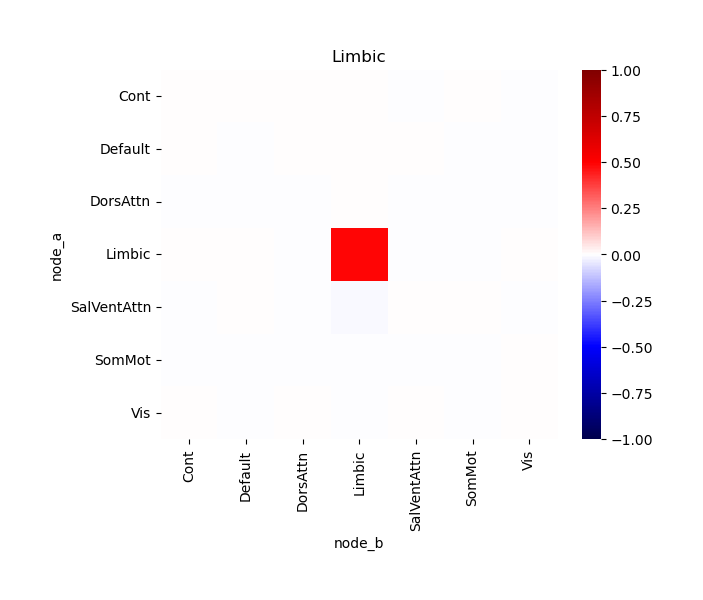

In [9]:
synthmat = MatrixResult(matrices, atlas)
for net, mat in zip(networks, synthmat.get_macro_matrices()):
    sns.heatmap(mat, cmap="seismic", vmin=-1, vmax=1)
    plt.title(net)
    plt.show()